## **Data Science Curriculum Design from Clustering Analysis**

### **1. Import required modules and libraries**

In [ ]:
!pip install treelib

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import unicodedata
import re
import nltk
from nltk.corpus import stopwords
from collections import Counter
import plotly.express as px
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import math as mth
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from collections import Counter
from treelib import Node, Tree

import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for treelib: filename=treelib-1.6.1-py3-none-any.whl size=18385 sha256=e97b852ce69db847ddfa1271f1f75ff5346926831563fddb0c5dae3d869bee93
  Stored in directory: /root/.cache/pip/wheels/71/df/8b/6b005e3bb9b275c24dfc392cda334f43f132e85a6f17cfad3a
Successfully built treelib


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### **2. Data collection and cleaning**

In [ ]:
# Load data
from google.colab import files 
uploaded = files.upload()

Saving webscraped_job_postings.csv to webscraped_job_postings.csv


In [ ]:
# Read data 
df = pd.read_csv("webscraped_job_postings.csv", index_col=0)    
df.head()

,Title,Company,Location,Rating,Date,Salary,Description,Links,Descriptions
0,Data Scientist,Driven Brands,"Benicia, CA",2.4,PostedPosted 26 days ago,NaN,You’ll be working alongside a team of eight an...,https://www.indeed.com/rc/clk?jk=74d176d595225...,We invite you to join us at Driven Brands!\nHe...
1,Business Analyst,Sabot Consulting,Remote,NaN,PostedPosted 4 days ago,$80 - $120 an hour,Preferred candidates will have prior experienc...,https://www.indeed.com/rc/clk?jk=f662b2efb509b...,Sabot Consulting (Sabot) is a management consu...
2,IT Business Intelligence Developer (FT) Remote...,Ballad Health,"Remote in Blountville, TN",3.0,PostedPosted 30+ days ago,NaN,Job Details Apply Save Print this job Email a…,https://www.indeed.com/rc/clk?jk=58612836c63b8...,Job Details\nApply\nSave\nPrint this job\nEmai...
3,Data Engineer,Longevity Holdings Inc.,"Remote in Minneapolis-Saint Paul, MN",NaN,PostedPosted 3 days ago,"$90,000 - $110,000 a year",Incorporate core data management competencies ...,https://www.indeed.com/company/TwentyFirst/job...,Position: Data Engineer\nLocation: MN\nAs a Da...
4,Network Administrator/dba developer,WKI Kenworth,"Wichita, KS 67219",NaN,EmployerActive 2 days ago,"$50,000 - $70,000 a year",The Network Administrator provides 2nd level e...,https://www.indeed.com/pagead/clk?mo=r&ad=-6NY...,Full Job Description\nThe Network Administrato...


In [ ]:
# Select the column needed for analysis
df2 = df["Descriptions"]
df2.head()

0    We invite you to join us at Driven Brands!\nHe...
1    Sabot Consulting (Sabot) is a management consu...
2    Job Details\nApply\nSave\nPrint this job\nEmai...
3    Position: Data Engineer\nLocation: MN\nAs a Da...
4    Full Job Description\nThe Network Administrato...
Name: Descriptions, dtype: object

In [ ]:
# Define cleaning functions
def parser(text):
    """removes html tags 
    and attributes using
    BeautifulSoup function
    """
    soup = BeautifulSoup(text, 'html.parser')
    return soup.get_text()

def normalize(text):
    """normalizes unicode 
    character to regular text
    """
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8')
    return text

def remove_URL(text):
    text = re.sub(r'http\S+', '', text) 
    text = re.sub(r'www\S+', '', text)
    return(text)

def remove_mentions(text):
    text = re.sub(r'@[A-Za-z0-9]+_[A-Za-z0-9]+_[A-Za-z0-9]+','',text) 
    text = re.sub(r'@[A-Za-z0-9]+_[A-Za-z0-9]+','',text)
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    return text

def remove_spaces(text):
    text = re.sub(r'\s+',' ',text)
    text = re.sub(r'-','',text)
    return text

def remove_nonletter(text):
    text = re.sub(r'[^a-zA-Z ]+', ' ', text)
    return text

In [ ]:
# Clean data with defined functions
df_clean = df2.astype(str).str.lower()
df_clean = df_clean.apply(parser)
df_clean = df_clean.apply(normalize)
df_clean = df_clean.apply(remove_URL)
df_clean = df_clean.apply(remove_mentions)
df_clean = df_clean.apply(remove_spaces)
df_clean = df_clean.apply(remove_nonletter)

In [ ]:
# Define stop words
stop_words = set(stopwords.words('english'))
stop_words.add("i'm")
stop_words.add("they're")
stop_words.add("thats")
stop_words.add("tho")
stop_words.add("also")

# Remove stop words
df_clean = df_clean.apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
df_clean.head()

0    invite join us driven brands headquartered cha...
1    sabot consulting sabot management consulting c...
2        job details apply save print job email friend
3    position data engineer location mn data engine...
4    full job description network administrator pro...
Name: Descriptions, dtype: object

### **3. Feature Engineering and Exploratory Data Analysis (EDA)**

In [ ]:
# Create dictionary of skills
skill_dict = {"communication": 0, "presentation": 1, "leadership": 2, "business acumen": 3, "consulting": 4, "project management": 5,
              "intellectual curiosity": 6, "critical thinking": 7, "creativity": 8, "problem solving": 9, "python": 10, "sql": 11, 
              "database": 12, "sas": 13, "excel": 14, "tableau": 15, "power bi": 16, "data visualization": 17, "machine learning": 18, 
              "deep learning": 19, "artificial intelligence": 20, "statistical analysis": 21, "hadoop": 22, "spark": 23, 
              "aws": 24, "azure": 25, "gcp": 26, "big data": 27}

In [ ]:
# Extract skills as features using TFIDF vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), 
                                       vocabulary=skill_dict, binary=True, 
                                       norm=None, use_idf=False)
tfidf_vec = tfidf_vectorizer.fit_transform(df_clean.values.astype('U'))
tfidf_array = tfidf_vec.toarray()
TFIDF_features = pd.DataFrame(data=tfidf_array, columns = tfidf_vectorizer.get_feature_names_out())
TFIDF_features

,communication,presentation,leadership,business acumen,consulting,project management,intellectual curiosity,critical thinking,creativity,problem solving,...,machine learning,deep learning,artificial intelligence,statistical analysis,hadoop,spark,aws,azure,gcp,big data
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1196,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1198,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Count the total number of each skill across all job postings
skills = TFIDF_features.columns.values.reshape(-1,1)
count = TFIDF_features.sum().values.reshape(-1,1)
sc_array = np.hstack((skills, count))
df3 = pd.DataFrame(data=sc_array, columns=["skills", "count"])
df3

,skills,count
0,communication,539.0
1,presentation,86.0
2,leadership,305.0
3,business acumen,34.0
4,consulting,90.0
5,project management,121.0
6,intellectual curiosity,17.0
7,critical thinking,51.0
8,creativity,69.0
9,problem solving,105.0


In [ ]:
# Figure 1
# Create a bar plot for count of skills across all job postings
fig = px.bar(df3, x="count", y="skills", title='Count of skills across all job postings', orientation='h', 
             width=700, height=1000, color='skills')
fig.show()

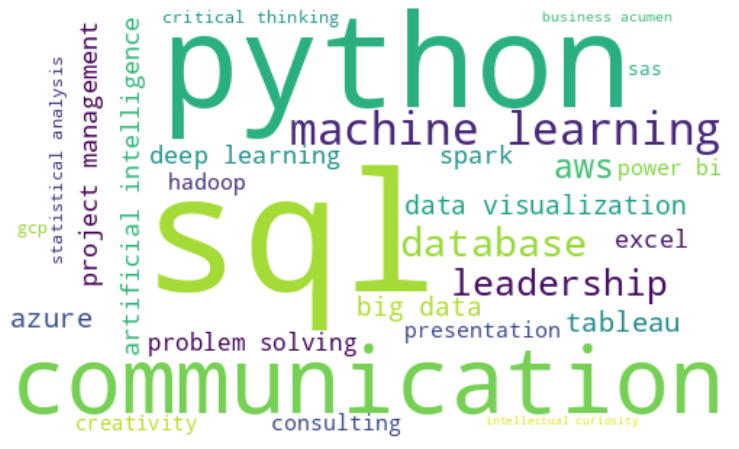

In [ ]:
# Figure 2
# Create wordcloud for count of skills across all job postings
tuples = [tuple(x) for x in df3.values]
wordcloud = WordCloud(background_color = 'white', width=500, height=300).generate_from_frequencies(dict(tuples))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### **4. Hierarchical clustering implementation**

In [ ]:
# Convert features to integers
df4 = TFIDF_features.apply(pd.to_numeric).astype(int)
df4

,communication,presentation,leadership,business acumen,consulting,project management,intellectual curiosity,critical thinking,creativity,problem solving,...,machine learning,deep learning,artificial intelligence,statistical analysis,hadoop,spark,aws,azure,gcp,big data
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1196,1,0,1,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,0,0
1197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1198,0,0,1,1,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0


In [ ]:
# Compute distance matrix
a = df4.values
D = np.zeros((a.shape[1], a.shape[1]))

for i in range(a.shape[0]):                                  # loops through all job postings
  d = np.zeros((a.shape[1], a.shape[1]))                     # create distance matrix (d) for each job posting
  for j in range(d.shape[0]):                                # loops through each row of d
    for k in range(d.shape[1]):                              # loops through each column of d
      d[j,k] = mth.sqrt((k - j)**2) * (a[i, j] * a[i, k])    # compute euclidean distance between skills

  D = D + d

In [ ]:
D

array([[0.000e+00, 6.700e+01, 3.380e+02, 6.900e+01, 1.480e+02, 3.450e+02,
        4.800e+01, 2.240e+02, 2.880e+02, 6.480e+02, 2.570e+03, 3.311e+03,
        2.040e+03, 4.940e+02, 9.240e+02, 1.170e+03, 6.080e+02, 1.241e+03,
        4.014e+03, 9.310e+02, 9.800e+02, 6.930e+02, 8.800e+02, 1.150e+03,
        2.712e+03, 1.925e+03, 5.460e+02, 1.647e+03],
       [6.700e+01, 0.000e+00, 2.700e+01, 1.400e+01, 1.800e+01, 6.000e+01,
        5.000e+00, 4.800e+01, 6.300e+01, 6.400e+01, 3.420e+02, 4.400e+02,
        2.530e+02, 1.560e+02, 1.950e+02, 2.660e+02, 1.350e+02, 4.160e+02,
        7.480e+02, 1.440e+02, 1.520e+02, 1.000e+02, 1.680e+02, 1.760e+02,
        2.530e+02, 1.920e+02, 7.500e+01, 2.600e+02],
       [3.380e+02, 2.700e+01, 0.000e+00, 1.300e+01, 5.800e+01, 1.380e+02,
        1.200e+01, 9.000e+01, 1.440e+02, 2.380e+02, 1.288e+03, 1.440e+03,
        6.900e+02, 3.740e+02, 2.880e+02, 7.670e+02, 3.780e+02, 7.350e+02,
        2.480e+03, 4.930e+02, 9.720e+02, 4.750e+02, 7.200e+02, 9.240e+02,
      

In [ ]:
# Implement hierarchical clustering
Y = sch.linkage(D, method='average')

[]

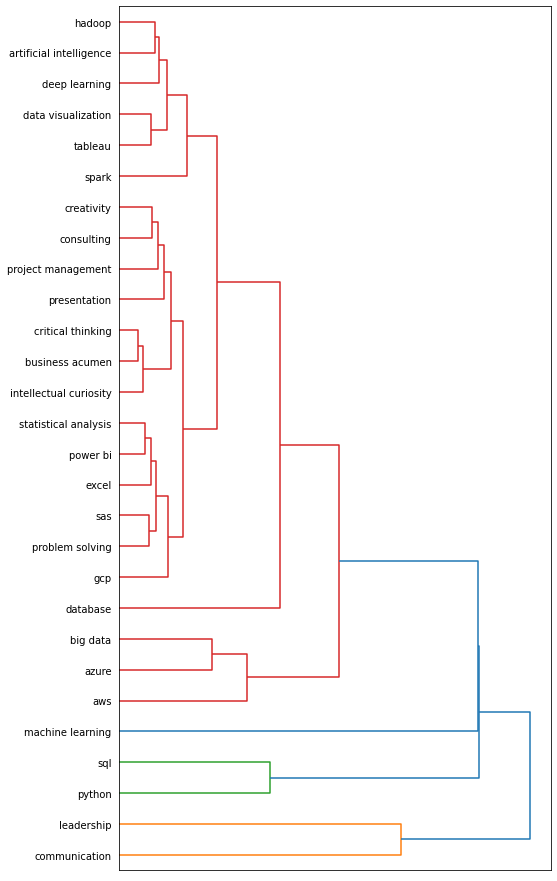

In [ ]:
# Figure 3
# Plot dendogram
fig = plt.figure(figsize=(15,20))
ax1 = fig.add_axes([0.3,0.3,0.4,0.6])


Z1 = sch.dendrogram(Y, orientation='right')
labels = df4.columns[Z1["leaves"]]
ax1.set_xticks([])
ax1.set_yticklabels(labels)

plt.plot() 

Cluster explanation

Based on the dendogram above, I will be choosing 9 clusters. The skills assigned to each cluster are listed below from the bottom of the dendogram:



*   Cluster 1: Communication and presentation
*   Cluster 2: Python, sql and machine learning

*   Cluster 3: Database, big data, aws, azure, gcp
*   Cluster 4: Statistical analysis, problem solving, excel, sas

*   Cluster 5: Intellectual curiosity, critical thinking, business acumen
*   Cluster 6: Creativity, consulting and project management 

*   Cluster 7: Data visualization, tableau and power bi
*   Cluster 8: Artificial intelligence, deep learning

*   Cluster 9: Hadoop, spark

I will interpret each cluster as courses and design 3 - 4 topics in each course in Part 5 (Interpretation of results)

### **5. Interpretation of results, discussion and course curriculum**

In this section I will interpret the clusters formed in part 4 into courses and topics and then visualize them in a simple tree diagram.   

In [ ]:
# Define tree
tree_1 = Tree()
tree_2 = Tree()
tree_3 = Tree()
tree_4 = Tree()
tree_5 = Tree()
tree_6 = Tree()
tree_7 = Tree()
tree_8 = Tree()
tree_9 = Tree()

In [ ]:
# Develop tree with courses
# Course 1
tree_1.create_node("1. Introduction to Programming Languages and Machine Learning", "1. introduction to programming languages and machine learning")  
tree_1.create_node("Python Programming for Data Science", parent="1. introduction to programming languages and machine learning")
tree_1.create_node("SQL Programming for Data Science", parent="1. introduction to programming languages and machine learning")
tree_1.create_node("End-to-end Machine Learning", parent="1. introduction to programming languages and machine learning")

# Course 2
tree_2.create_node("2. Statistical Analysis and Problem Solving in Data Science Workflow", "2. statistical analysis and problem solving in data science workflow")  
tree_2.create_node("Basic and Intermediate Statistics", parent="2. statistical analysis and problem solving in data science workflow")
tree_2.create_node("Problem Solving Methodology in Data Scinece Workflow", parent="2. statistical analysis and problem solving in data science workflow")
tree_2.create_node("Introduction to Excel and SAS for Analytics", parent="2. statistical analysis and problem solving in data science workflow")

# Course 3
tree_3.create_node("3. Distributed Computing and Programming Big Data", "3. distributed computing and programming big data")  
tree_3.create_node("Basics of Distributed Computing for Processing Big Data", parent="3. distributed computing and programming big data")
tree_3.create_node("Introduction to Hadoop", parent="3. distributed computing and programming big data")
tree_3.create_node("Introduction to Spark", parent="3. distributed computing and programming big data")

# Course 4
tree_4.create_node("4. Introduction to Database Management and Big Data Frameworks", "4. introduction to database management and big data frameworks")  
tree_4.create_node("Database Management - SQL Databases ", parent="4. introduction to database management and big data frameworks")
tree_4.create_node("Database Management - NoSQL Databases", parent="4. introduction to database management and big data frameworks")
tree_4.create_node("Introduction to Big Data Architectures - AWS, Azure, GCP", parent="4. introduction to database management and big data frameworks")

# Course 5
tree_5.create_node("5. Data Visualization, Analytics and Business Intelligence", "5. data visualization, analytics and business intelligence")  
tree_5.create_node("Data Visualization with Python - Matplotlib, Seaborn, Plotly", parent="5. data visualization, analytics and business intelligence")
tree_5.create_node("Foundations of Analytics and Business Intelligence", parent="5. data visualization, analytics and business intelligence")
tree_5.create_node("Data Visualizations with Tableau and Power BI", parent="5. data visualization, analytics and business intelligence")

# Course 6
tree_6.create_node("6. Communication and Presentation of Data Science Projects", "6. communication and presentation of data science projects")  
tree_6.create_node("Foundation of Effective Communication", parent="6. communication and presentation of data science projects")
tree_6.create_node("Building Self-confidence and Presentation Skills", parent="6. communication and presentation of data science projects")
tree_6.create_node("Designing Human-centric and Engaging Power-point Slides", parent="6. communication and presentation of data science projects")

# Course 7
tree_7.create_node("7. Analytics and Business Growth", "7. analytics and business growth")  
tree_7.create_node("Exploiting the Power of Critical Thinking", parent="7. analytics and business growth")
tree_7.create_node("Developing the Mind Through Intellectual Curiosity", parent="7. analytics and business growth")
tree_7.create_node("Solving Business Problems with Critical Thinking, Intellectual Curiosity and Analytics", parent="7. analytics and business growth")

# Course 8
tree_8.create_node("8. Artificial Intelligence, Deep Learning and Computer Vision", "8. artificial intelligence, deep learning and computer vision")  
tree_8.create_node("Introduction to neural netwroks", parent="8. artificial intelligence, deep learning and computer vision")
tree_8.create_node("Introduction to deep learning frameworks - Keras, TensorFlow", parent="8. artificial intelligence, deep learning and computer vision")
tree_8.create_node("Introduction to AI frameworks in Data Science", parent="8. artificial intelligence, deep learning and computer vision")

# Course 9
tree_9.create_node("9. Project Management and Consulting Essentials", "9. project management and consulting essentials")  
tree_9.create_node("Creative and Design Thinking", parent="9. project management and consulting essentials")
tree_9.create_node("Introduction to Project Management", parent="9. project management and consulting essentials")
tree_9.create_node("Foundations of Consulting for Data Science Professionals", parent="9. project management and consulting essentials")

Node(tag=Foundations of Consulting for Data Science Professionals, identifier=44164cb4-b9d3-11ed-8e4f-0242ac1c000c, data=None)

In [ ]:
# Display tree
tree_1.show()
tree_2.show()
tree_3.show()
tree_4.show()
tree_5.show()
tree_6.show()
tree_7.show()
tree_8.show()
tree_9.show()

1. Introduction to Programming Languages and Machine Learning
├── End-to-end Machine Learning
├── Python Programming for Data Science
└── SQL Programming for Data Science

2. Statistical Analysis and Problem Solving in Data Science Workflow
├── Basic and Intermediate Statistics
├── Introduction to Excel and SAS for Analytics
└── Problem Solving Methodology in Data Scinece Workflow

3. Distributed Computing and Programming Big Data
├── Basics of Distributed Computing for Processing Big Data
├── Introduction to Hadoop
└── Introduction to Spark

4. Introduction to Database Management and Big Data Frameworks
├── Database Management - NoSQL Databases
├── Database Management - SQL Databases 
└── Introduction to Big Data Architectures - AWS, Azure, GCP

5. Data Visualization, Analytics and Business Intelligence
├── Data Visualization with Python - Matplotlib, Seaborn, Plotly
├── Data Visualizations with Tableau and Power BI
└── Foundations of Analytics and Business Intelligence

6. Communicat

### **6. Conclusion**

The sequence of courses presented in the tree diagram is not as they appear in the dendogram in part 4 to allow prerequisites courses to be taken first. In addition the arrangement of topics in each course was rendered randomly by the tree diagram against the way they were ordered in the code. For example in **Couse 1: Introduction to Programming Languages and Machine Learning**, Python Programming for Data Science should be taken first before any other topic.